# COGS 108 - Final Project: Does Political Party Affiliation Affect Crime Rate?

# Names
* Stephen Li (XXXXXXXXX)
* John Jun (XXXXXXXXX)
* Winnie Chang (XXXXXXXXX)
* Alexandria Tran (XXXXXXXXX)
* Amanda Bustamante (XXXXXXXXX)

# Overview
The impetus for the topic of this project came from growing concerns over the increased partisan rhetoric that has been seeping through America’s political sphere and how that has influenced violent crimes in this country, such as the mass shooting event close to home this past April. There are distinct approaches to preventing crime and doling out punishment across the aisle, where both parties place blame on the other at any opportunity possible, but we as a group wanted to know if any of these accusations about these approaches were supported by hard statistics and data. In order to reduce any potential bias of our own, all data collected is readily verifiable public information, published by independent governmental agencies. 

# Research Question
This project will explore, on a state level, whether political partisanship in the government affects its law enforcement expenditures and whether policies enacted into law directly influences the overall crime rate in the state. According to the rhetoric made by Republicans, criminal justice and police spending is a top priority, touting their conservatism and harsher punitive policies as a “tough on crime” deterrent to their voters. We seek to quantify whether or not federal representation is enough to influence overall crime rates in a state. This is thus surmised in our research question:  
Does the political makeup of a state’s House of Representatives have a correlation to that state’s crime rates?

# Background and Prior Work
The question chosen to be addressed by this project should be of interest of every American citizen of voting age and ability today. Unfortunately, American voters are forced to make important decisions while living in an age of rampant political disinformation and unchecked statements as well as ever increasing commonality of violent crimes such as mass shootings, murders and drug related crimes that affect each individual in one way or another. With the next presidential election and several congressional seats open for election just over the horizon, we sought to quantify if there was a political party that was actually more effective at reducing crime in the context of each state’s population. 

Initially, we sought to “follow the money” of how state’s budgets were spent on criminal justice systems and law enforcement agencies in the state but the data was difficult to find and overall not uniform across states. It was then realized that there is an inseparable relationship between political affiliation and how this shapes the views and perspectives behind legislation passed, policies enacted and delegation of funds by these representatives. Each party platform follows distinct modalities to reduce crime: deterrence or prevention. Each counts on a form of social control that either based on societal enforcement or societal support. Republicans typically favor legislation, policy and public spending on things such as Second Amendment rights, hefty incarceration times, and reduction of social welfare programs. Democrats tend to promote early interventions to prevent most forms of crime from occurring in the first place such as lifetime education availability, access to basic needs such as healthcare and affordable housing, and reform programs to aid those already incarcerated. These trends are usually observed on national, state and local levels of government with our focus being on the representatives serving each state in the House. These representatives are responsible for the allocation of funding for a large part of each state’s budget, legislation regarding taxation which generates the majority of all funding and how the funding is to be used on which types of sectors or programs. 

In a 2009 study done by Fernando Ferraria and Joseph Gyourko, they examined whether the political affiliation of the mayor affected factors such as crime rates, and they concluded that political affiliation did not have a statistically significant impact. However, they also said that results tended to be different on a state or federal level. In a 2018 paper, Burch proposed that the Republican deterrence based model of crime reduction via more funding to enforcement agencies and less funding on social welfare programs would lead to a reduction in crime rates using the same source for state crime rates published by the federal website we decided to utilize. Instead, he discovered “Republican controlled states had higher crime rates for both property and violent crime. This finding was consistent across all the models estimated in the present study.” These conflicting findings led us to collect our own data and perform our own analyses over a longer period of time to see which finding we could duplicate and support. 

References :
* Burch, X. D. (2018, June). Political Decisions on Police Expenditures: Examining the Potential Relationship Between Political Structure, Police Expenditures and the Volume of Crime Across US States. Retrieved from https://scholarcommons.usf.edu/etd/7269/
* Ferreria, F., & Gyourko, J. (2009, February 1). Do Political Parties Matter? Evidence from U.S. Cities *. Retrieved from https://doi.org/10.1162/qjec.2009.124.1.399

# Hypothesis
Our hypothesis is that there exists an association between the political party affiliation represented in each state and the total crime rate. We believe that this hypothesis is reasonable since Democrats and Republicans have distinct perspectives on how to prevent crime which ultimately influences the legislation their representatives pass, the policies they enact and how funds are allocated within budgets. It is not unreasonable to believe that these influential representatives and their chosen party could have an effect on the crime rate in a state. We predict that representative’s political party affiliation does impact a state’s overall crime rate, with Democratic perspective towards prevention and support showing an overall reduction in their respective states crime rates.

# Dataset(s)
DATA 1:
This dataset is composed of crime data per state by year for both violent crimes and property crimes. Violent crime includes Violent Crime rate, Murder and nonnegligent manslaughter rate, Legacy rape rate, Revised rape rate, Robbery rate, and Aggravated assault rate. Property crime includes property crime rate, burglary rate, larceny-theft rate, and motor vehicle theft rate. This dataset covers years from 1960 to 2014 (total of 75 data points for state). The data is crime rate per 100,000 population.
* Dataset Name: State Crime Data (UCR) 
* Link: https://www.ucrdatatool.gov/Search/Crime/State/StatebyState.cfm


DATA 2:
This dataset is composed of biannual political split in all states in the United States. The political split was represented as one of the three: “D” for Democratic, “S” for Split, “R” for Republican. The dataset contains data from 1978 to 2014 (biannual → total of 18 data points per state). Hence, we have 19 columns, each representing the year’s political split for each state. 
* Dataset Name: State Political Split (NCSL).
* Link: http://www.ncsl.org/research/about-state-legislatures/partisan-composition.aspx

# Setup
We imported matplotlib pyplot to generate plots for visualization purposes.
We imported numpy and pandas to load datasets and to manage and manipulate the dataframes.
We imported scipy stats to run statistical analysis using the linregress(x, y) function to generate slope, intercept, r_value, p_value, and standard error.
We imported seaborn to generate a violin plot for visualization purposes.
We imported patsy and statsmodels.api to perform OLS. 

In addition to the package imports, we used the magic commands as follows for their respective purposes.
```
#This magic command plots figures directly in the notebook
%matplotlib inline

#This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'
```

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# This magic command plots figures directly in the notebook
%matplotlib inline

# This sets a higher resolution for figures
%config InlineBackend.figure_format = 'retina'

# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Seaborn
import seaborn as sns

# Data Cleaning 
We obtained two types of data: (1) the political split for each state and (2) the crime rates for each state. 

Each dataset was downloaded as .csv file format from the UCR Data Tool site and NCSL website, respectively, and its content was accessed using Google Sheet for convenience. Cleaning the data was unnecessary because the data was already organized and cleaned by the UCR Data Tool site (downloadable in .csv format). However, we still needed to rearrange the data format such that it would be suitable for data analysis. While most rearrangement works were done utilizing data frames such as numpy and pandas, our group did manual transformation of dataset as well.

In the pre-processing steps, we did the following:
* 1) Merge the datasets for each state into a single excel sheet using Google Sheet
* 2) Match the years for the crime data and the political affiliation data as the former is an annual data and the latter is biannual.
* 3) Elimination of variables deemed inadequate for analysis

For (1) and (2), a separate google sheet was created, containing the Party Affiliation, Violent Crime Rate, Property Crime Rate, and Total Crime Rate (Violent Crime Rate + Property Crime Rate) for each state for every two years.

The original crime dataset contained various types of crimes including but not limited to violent crime, legacy rape, aggravated assault, property crime, and motor vehicle theft. For (3), among the reported types of violent crimes, we excluded the rape rates (legacy rape and revised rape) as these are, too heavily dependent on self reporting.

## Display Party Affiliation Data

In [30]:
df_years = pd.read_csv('COGS 108_ State Data - Sheet4.csv')
df_years.head()

,Year,1978,1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014
0,Ohio,D,S,D,S,S,S,S,S,R,R,R,R,R,R,R,S,S,R,R
1,Alabama,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,R,R
2,Rhode Island,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D
3,Virginia,D,D,D,D,D,D,D,D,D,S,S,R,R,R,R,S,S,S,S
4,Illinois,D,S,D,D,D,D,D,S,S,S,S,S,D,D,D,D,D,D,D


In [31]:
# R = 0, S = 1, D = 2
df_years_replaced = df_years.replace(['R','S','D'], [0,1,2])
df_years_replaced.head()

,Year,1978,1980,1982,1984,1986,1988,1990,1992,1994,1996,1998,2000,2002,2004,2006,2008,2010,2012,2014
0,Ohio,2,1,2,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0
1,Alabama,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0
2,Rhode Island,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,Virginia,2,2,2,2,2,2,2,2,2,1,1,0,0,0,0,1,1,1,1
4,Illinois,2,1,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2


## Display Crime Rate Data

In [32]:
df_ca = pd.read_csv('crimedata/california_crime.csv')
df_ca.head()

,Year,Violent Crime,Murder and Nonnegligent Manslaughter,Legacy Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft
0,1960,239.0,3.9,18.2,97.3,119.6,3235.4,910.5,1984.8,340.1
1,1961,232.7,3.7,18.5,90.5,120.0,3177.5,894.2,1950.6,332.7
2,1962,234.8,3.9,17.4,91.9,121.7,3326.2,934.1,2052.9,339.2
3,1963,241.2,3.8,17.5,93.6,126.3,3545.8,998.9,2184.7,362.2
4,1964,265.6,4.1,20.0,103.2,138.2,3874.3,1088.7,2366.5,419.1


In [33]:
df_fl = pd.read_csv('crimedata/florida_crime.csv')
df_al = pd.read_csv('crimedata/alabama_crime.csv')
df_il = pd.read_csv('crimedata/illinois_crime.csv')
df_mo = pd.read_csv('crimedata/montana_crime.csv')
df_oh = pd.read_csv('crimedata/ohio_crime.csv')
df_penn = pd.read_csv('crimedata/penn_crime.csv')
df_ri = pd.read_csv('crimedata/rhodeisland_crime.csv')
df_vi = pd.read_csv('crimedata/virginia_crime.csv')
df_wy = pd.read_csv('crimedata/wyoming_crime.csv')

## Measures of Central Tendency

In [34]:
df_ca.describe()

,Year,Violent Crime,Murder and Nonnegligent Manslaughter,Legacy Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1987.00000,633.252727,8.187273,33.774545,238.550909,352.441818,4657.490909,1299.329091,2712.254545,645.889091
std,16.02082,247.621045,3.083472,11.108759,96.227652,150.985053,1408.418907,570.152725,748.989155,191.447667
min,1960.00000,232.700000,3.700000,17.400000,90.500000,119.600000,2441.100000,522.300000,1527.400000,332.700000
25%,1973.50000,450.950000,5.600000,24.450000,172.850000,240.450000,3299.500000,684.650000,2005.400000,508.200000
50%,1987.00000,610.600000,7.100000,32.100000,210.600000,338.700000,4865.100000,1277.400000,2856.900000,644.300000
75%,2000.50000,812.900000,10.750000,42.100000,327.600000,424.200000,5814.050000,1741.150000,3362.950000,712.950000
max,2014.00000,1119.700000,14.500000,58.200000,424.100000,641.600000,6939.500000,2316.500000,3880.000000,1038.900000


In [35]:
df_fl.describe()

,Year,Violent Crime,Murder and Nonnegligent Manslaughter,Legacy Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny-theft,Motor Vehicle Theft
count,55.00000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1987.00000,729.278182,9.267273,36.634545,222.690909,460.261818,5221.970909,1483.469091,3280.465455,458.040000
std,16.02082,287.432383,3.089172,15.103203,97.799614,184.312847,1659.784672,551.430762,990.611656,210.980285
min,1960.00000,192.100000,5.000000,5.800000,63.300000,115.300000,2243.300000,708.700000,1353.000000,168.300000
25%,1973.50000,527.550000,6.300000,26.800000,161.350000,328.450000,3913.500000,972.200000,2509.950000,302.800000
50%,1987.00000,716.400000,9.100000,38.000000,199.000000,495.800000,5125.200000,1459.800000,3154.800000,426.700000
75%,2000.50000,953.100000,11.400000,50.450000,293.400000,577.500000,6671.400000,1966.750000,4222.450000,578.050000
max,2014.00000,1244.300000,15.400000,56.900000,416.800000,785.700000,7819.900000,2506.800000,4760.600000,911.500000


# Data Analysis & Results

## Scatter Plot
On our x-axis, the party affiliation is listed using 0, 1, and 2. 0 represents states that are Republican. 1 represents states that were split in the middle. 2 represents states that were Democratic. Examining the scatter plot shows that for all the states and years we covered in our data set, Democratic states tended to have higher crime rates, while split affiliation and Republic states had similar crime rate numbers, with a few outliers having higher crime rates. In general, the majority of all states tended to land upon a range of 2800-5000 for crime rate.
In the correlation matrix (D1 = Party Affiliation, D2 = Violent Crime Rate, D3 = Property Crime Rate, D4 = Total Crime Rate), we see that Party Affiliation has similar correlations with Violent Crime Rate, Property Crime Rate, and Total Crime Rate. Interestingly, it is also observed that Property Crime Rate has a very high correlation with Total Crime Rate, and overall it seems consistent that if a state has a high Violent Crime Rate, then it also has a high Property Crime rate.

Text(0, 0.5, 'Total Crime Rate')

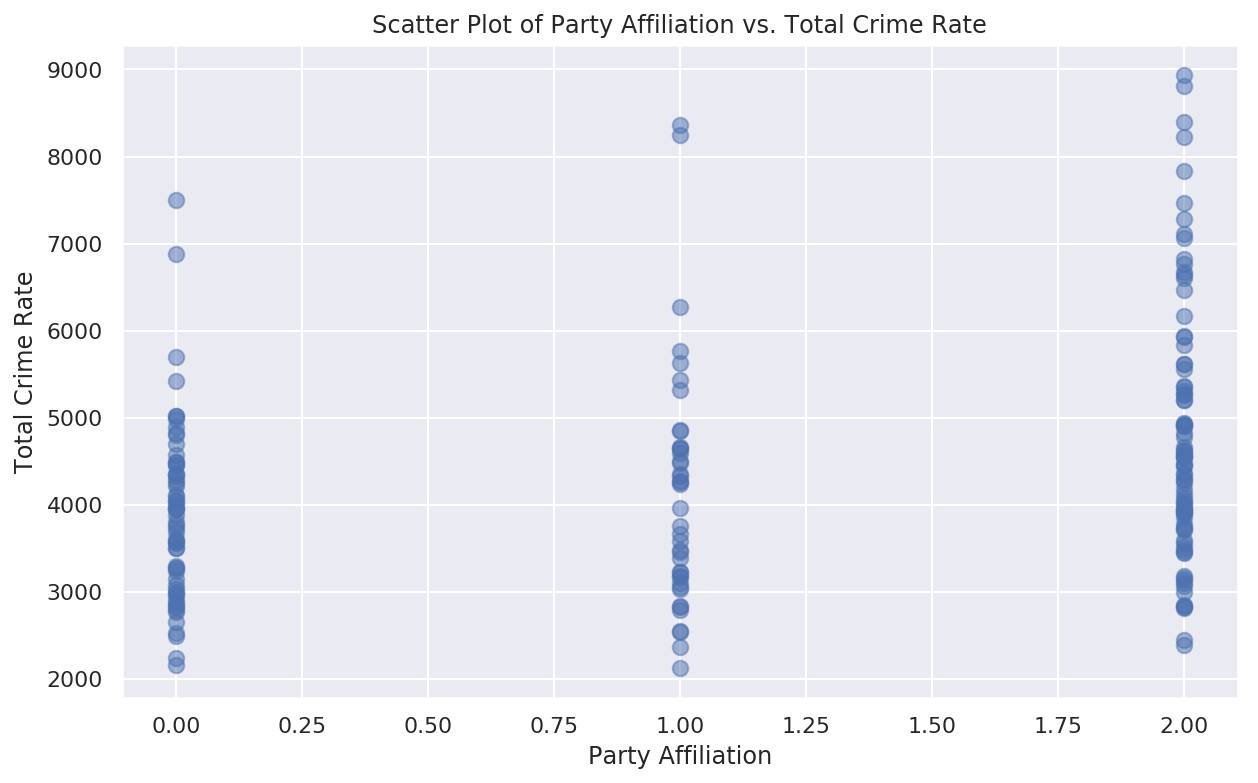

In [36]:
df_analysis = pd.read_csv('crimedata/experimental_dataset.csv')
df_analysis = df_analysis.dropna(axis='columns')
df_analysis = df_analysis.replace(['R','S','D'], [0,1,2])
x = df_analysis['Party Affiliation']
y = df_analysis['Total Crime Rate']

plt.figure(figsize=(10,6))
plt.scatter(x,y,s=60,alpha=0.5)
plt.title('Scatter Plot of Party Affiliation vs. Total Crime Rate')
plt.xlabel('Party Affiliation')
plt.ylabel('Total Crime Rate')
# may depend more on population rather than party affiliation? Confounding factor
# graph all the yearly data on one scatter plot <-
# merge violent crime rate and property crime rate <-
# averaging all year data together for another analysis
# combining violent crime rate and property crime rate


# p-value regression on the scatterplot, comparing it to a straight line
# add other states for line graphs

## Correlation Matrix

In [37]:
df_analysis.corr()

,Party Affiliation,Violent Crime Rate,Property Crime Rate,Total Crime Rate
Party Affiliation,1.000000,0.303099,0.278807,0.294969
Violent Crime Rate,0.303099,1.000000,0.719456,0.800093
Property Crime Rate,0.278807,0.719456,1.000000,0.992268
Total Crime Rate,0.294969,0.800093,0.992268,1.000000


## Box Plot
The box plot allows us to get a more specific look into the data distribution of the scatter plot. According to the box plot, it seems that the distribution of data for Republican and Split states are surprisingly similar, having 1st quartiles, 3rd quartiles, and medians that are close to each other. It also seems that the majority of the data points are Democratic, followed by Republicans, with Split distributions in last. It's interesting to note the data distribution of the states that had split political parties; it looks like there are two peaks in the distribution, although this is unlikely to persist if we included more data points.

Text(0.5, 1.0, 'Box Plot of Party Affiliation vs. Total Crime Rate')

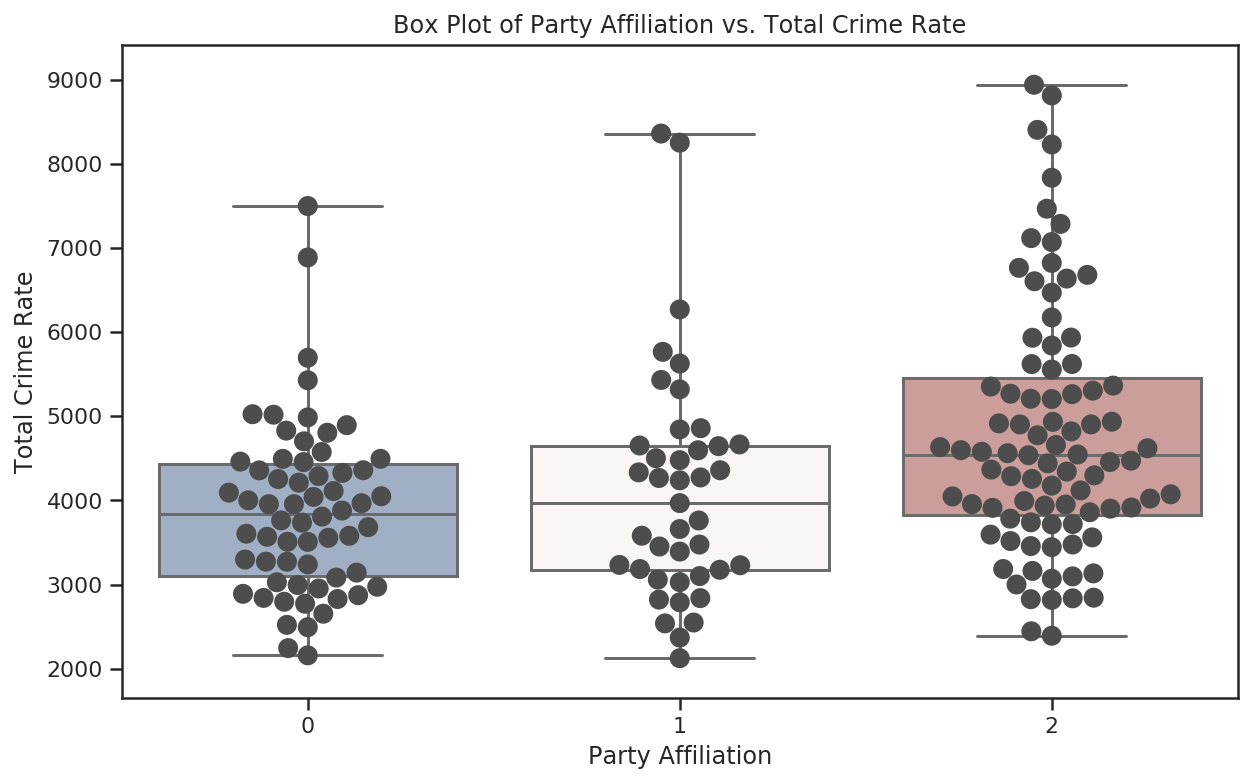

In [38]:
sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 6))



# Plot the orbital period with horizontal boxes
sns.boxplot(x, y, data=df_analysis, whis="range", palette="vlag")

# Add in points to show each observation
sns.swarmplot(x, y, data=df_analysis, size=10,color=".3", linewidth=0)
plt.title('Box Plot of Party Affiliation vs. Total Crime Rate')

## Violin Plot
The violin plot is another visualization, similar to the box plot, for plotting numeric data. The benefit of using a violin plot is that it has an additional feature of a curved kennel density plot of the side. From the plot, we see 3 separate figures that resemble violins. An interesting observation is that the distribution of the highest total crime rate data is seen in Democratic and Split states. There is a significant amount of states that have their total crime rates somewhere around 4000. 

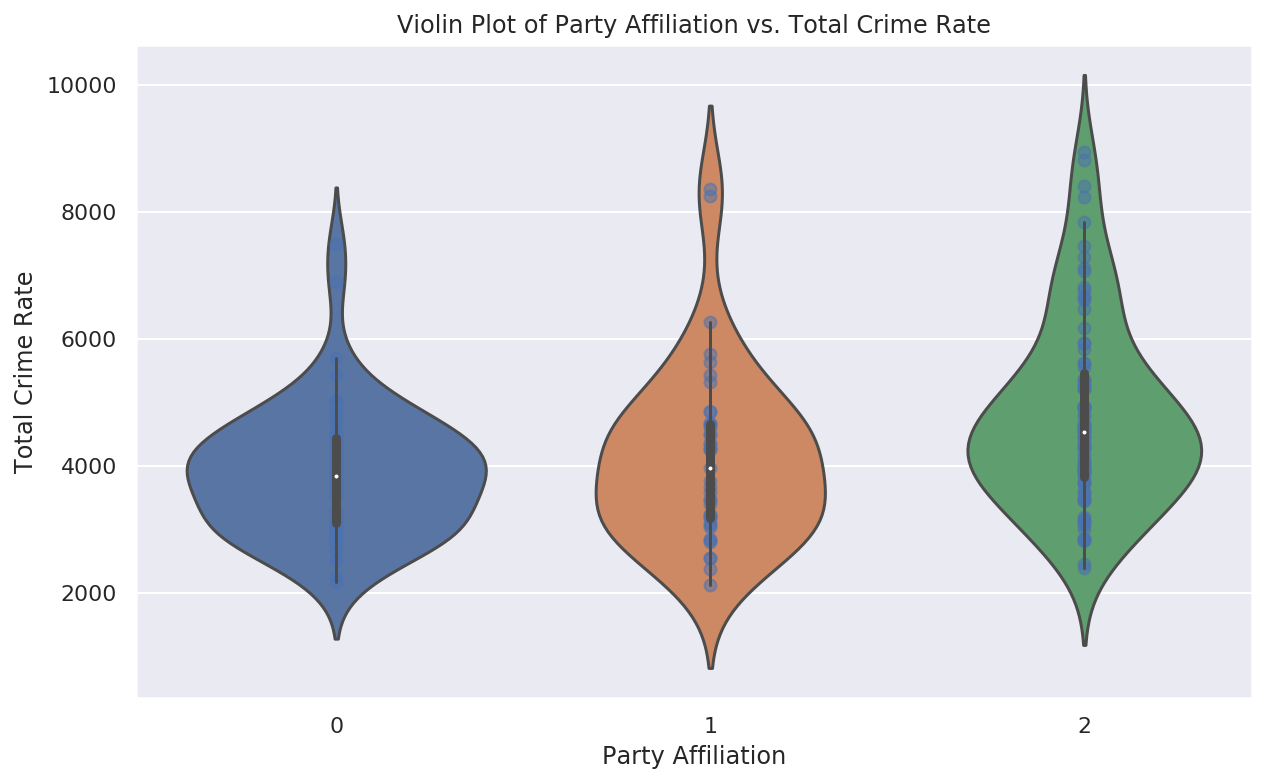

In [40]:
ax = sns.violinplot(x, y, split=True, data=df_analysis)
sns.set(rc={'figure.figsize':(10,6)})
plt.scatter(x, y, alpha=0.5)
plt.title('Violin Plot of Party Affiliation vs. Total Crime Rate')
plt.xlabel('Party Affiliation')
plt.ylabel('Total Crime Rate')
plt.show()

## Display Change in Crime Rate Overtime 
When displaying the change in crime rates over time, we see that there is a tendency for all states to have similar peaks and valleys, rising until a peak around the 1990s, then gradually falling down afterwards. However, some states were more pronounced in these trends more than others. For example, California and Florida had by far the sharpest increases and decreases in crime rate over time, while the rest of the states we examined had a large rise in total crime rate and only had smaller decreases in total crime rate. There are a lot of potential causes for this phenomenon, but given that Florida and California have much higher population counts than the rest of the states, the differences in total crime rate could be due to the fact that crime rate is more likely to occur on population dense areas.

Text(0, 0.5, 'Violent Crime')

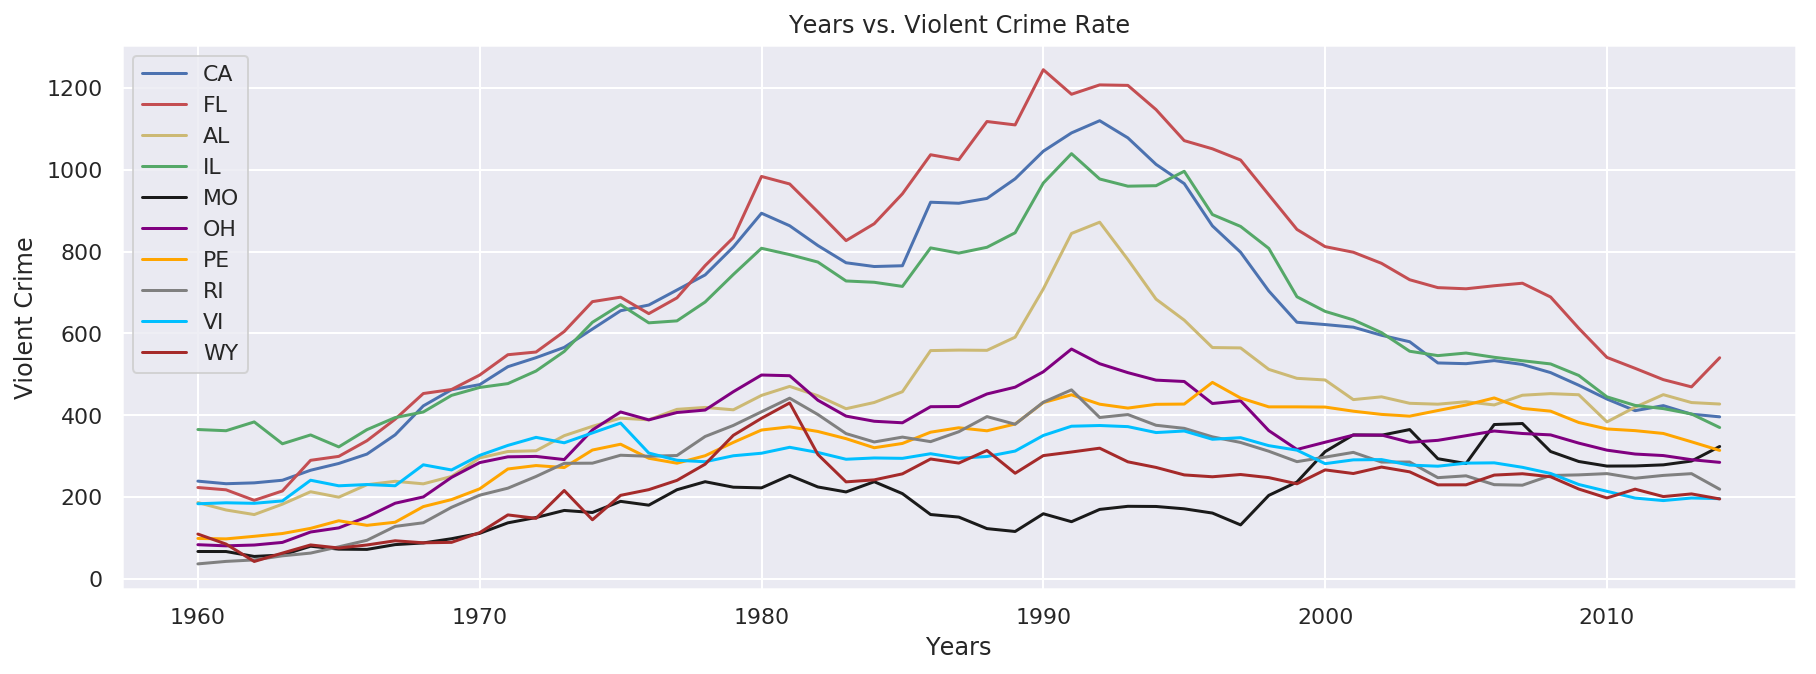

In [41]:
# Years vs. Crimes
x_ca = df_ca['Year']
y_ca = df_ca['Violent Crime']
x_fl = df_fl['Year']
y_fl = df_fl['Violent Crime']
x_al = df_al['Year']
y_al = df_al['Violent Crime']
x_il = df_il['Year']
y_il = df_il['Violent Crime']
x_mo = df_mo['Year']
y_mo = df_mo['Violent Crime']
x_oh = df_oh['Year']
y_oh = df_oh['Violent Crime']
x_penn = df_penn['Year']
y_penn = df_penn['Violent Crime']
x_ri = df_ri['Year']
y_ri = df_ri['Violent Crime']
x_vi = df_vi['Year']
y_vi = df_vi['Violent Crime']
x_wy = df_wy['Year']
y_wy = df_wy['Violent Crime']

f1 = plt.figure(figsize=(15,5))
plt.plot(x_ca, y_ca, 'b', label='CA')
plt.plot(x_fl, y_fl, 'r', label='FL')
plt.plot(x_al, y_al, 'y', label='AL')
plt.plot(x_il, y_il, 'g', label='IL')
plt.plot(x_mo, y_mo, 'k', label='MO')
plt.plot(x_oh, y_oh, 'purple', label='OH')
plt.plot(x_penn, y_penn, 'orange', label='PE')
plt.plot(x_ri, y_ri, 'gray', label='RI')
plt.plot(x_vi, y_vi, 'deepskyblue', label='VI')
plt.plot(x_wy, y_wy, 'brown', label='WY')

plt.legend()
plt.title('Years vs. Violent Crime Rate')
plt.xlabel('Years')
plt.ylabel('Violent Crime')

Text(0, 0.5, 'Total Crime')

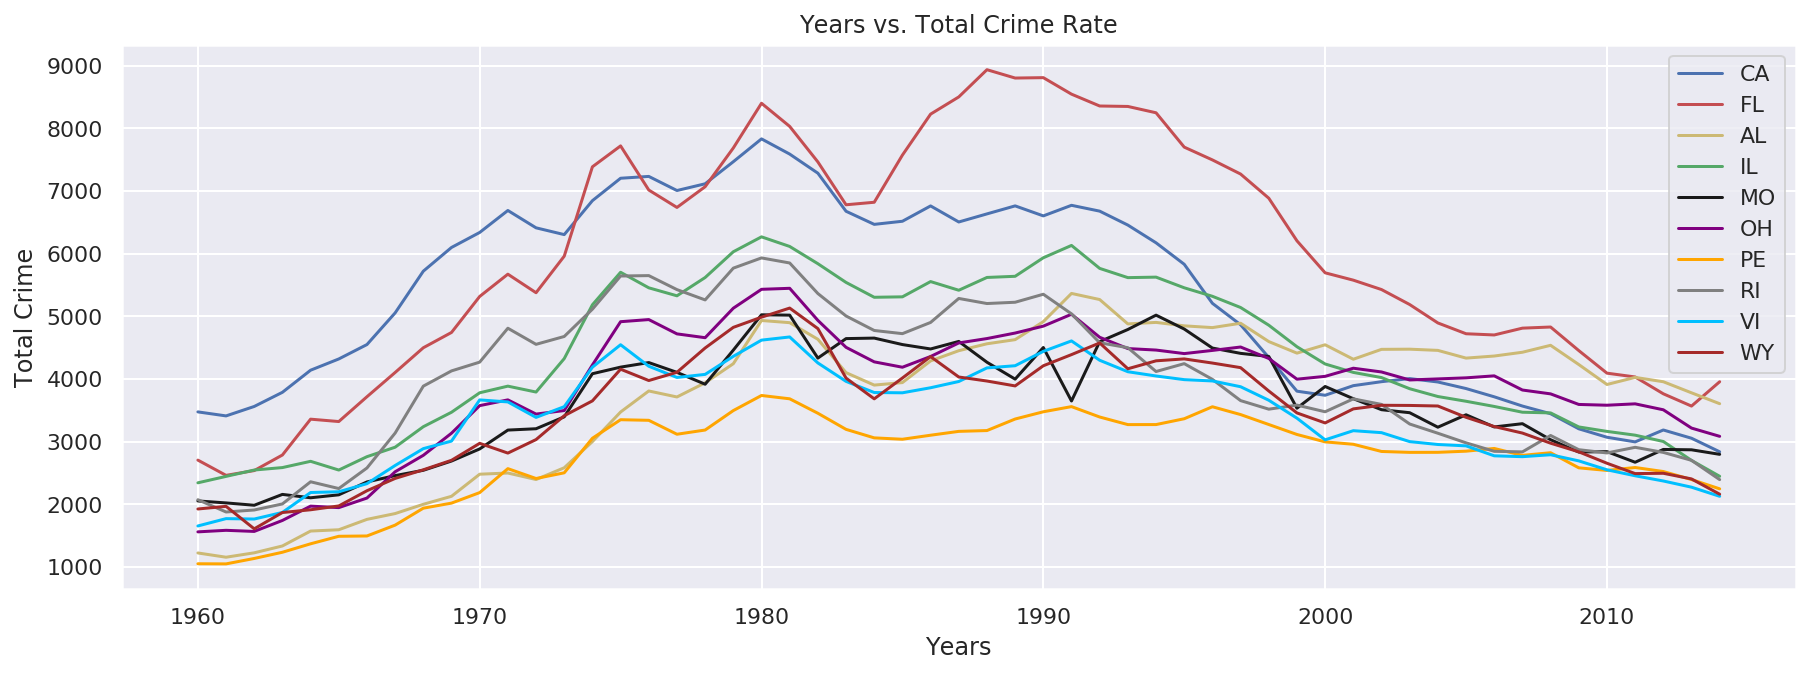

In [42]:
# Years vs. Total Crime
x_ca = df_ca['Year']
y_ca = df_ca['Violent Crime'] + df_ca['Property Crime']
x_fl = df_fl['Year']
y_fl = df_fl['Violent Crime'] + df_fl['Property Crime']
x_al = df_al['Year']
y_al = df_al['Violent Crime'] + df_al['Property Crime']
x_il = df_il['Year']
y_il = df_il['Violent Crime'] + df_il['Property Crime']
x_mo = df_mo['Year']
y_mo = df_mo['Violent Crime'] + df_mo['Property Crime']
x_oh = df_oh['Year']
y_oh = df_oh['Violent Crime'] + df_oh['Property Crime']
x_penn = df_penn['Year']
y_penn = df_penn['Violent Crime'] + df_penn['Property Crime']
x_ri = df_ri['Year'] 
y_ri = df_ri['Violent Crime'] + df_ri['Property Crime']
x_vi = df_vi['Year']
y_vi = df_vi['Violent Crime'] + df_vi['Property Crime']
x_wy = df_wy['Year']
y_wy = df_wy['Violent Crime'] + df_wy['Property Crime']

f1 = plt.figure(figsize=(15,5))
plt.plot(x_ca, y_ca, 'b', label='CA')
plt.plot(x_fl, y_fl, 'r', label='FL')
plt.plot(x_al, y_al, 'y', label='AL')
plt.plot(x_il, y_il, 'g', label='IL')
plt.plot(x_mo, y_mo, 'k', label='MO')
plt.plot(x_oh, y_oh, 'purple', label='OH')
plt.plot(x_penn, y_penn, 'orange', label='PE')
plt.plot(x_ri, y_ri, 'gray', label='RI')
plt.plot(x_vi, y_vi, 'deepskyblue', label='VI')
plt.plot(x_wy, y_wy, 'brown', label='WY')

plt.legend()
plt.title('Years vs. Total Crime Rate')
plt.xlabel('Years')
plt.ylabel('Total Crime')

## Data Analysis and Results
In the end we chose to do a linear regression to analyze the data because it would allow us to determine whether party affiliation is a significant predictor of crime rate by looking at the p-value. We just want to find out whether party affiliation affects crime rate, and it would be simple enough to add on our existing scatter plot. First we need to shape our data in a way that would allow us to perform a simple linear regression. We cannot use categorical variables for linear regressions, but converting party affiliation to integers by replacing ‘R’ with 0, ‘S’ with 1, and ‘D’ with 2 is possible and would allow us to perform linear regressions. We also made the decision to include the data for all of the years on the scatter plot rather than just one year because we would not have enough points otherwise. Importing patsy and statsmodels python packages allows us to fit our data to a linear regression, and printing out a summary gives us the p-value. For data visualization purposes we can put the line on the scatter plot which shows us a line with a slight positive slope. Performing a linear regression confirms that party affiliation is a significant predictor of total crime rate in the context of our data, since we get a p-value that is less than 0.05, and given the results of our data visualization this analysis seems reasonable.

## Linear Regression

In [43]:
# hacky way of dealing with the syntax errors
df_analysis.columns = ['State','D1', 'D2', 'D3', 'D4']
outcome, predictors = patsy.dmatrices('D4 ~ D1', df_analysis)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                     D4   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     17.92
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           3.61e-05
Time:                        23:16:46   Log-Likelihood:                -1634.5
No. Observations:                 190   AIC:                             3273.
Df Residuals:                     188   BIC:                             3280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3827.6259    157.059     24.371      0.0

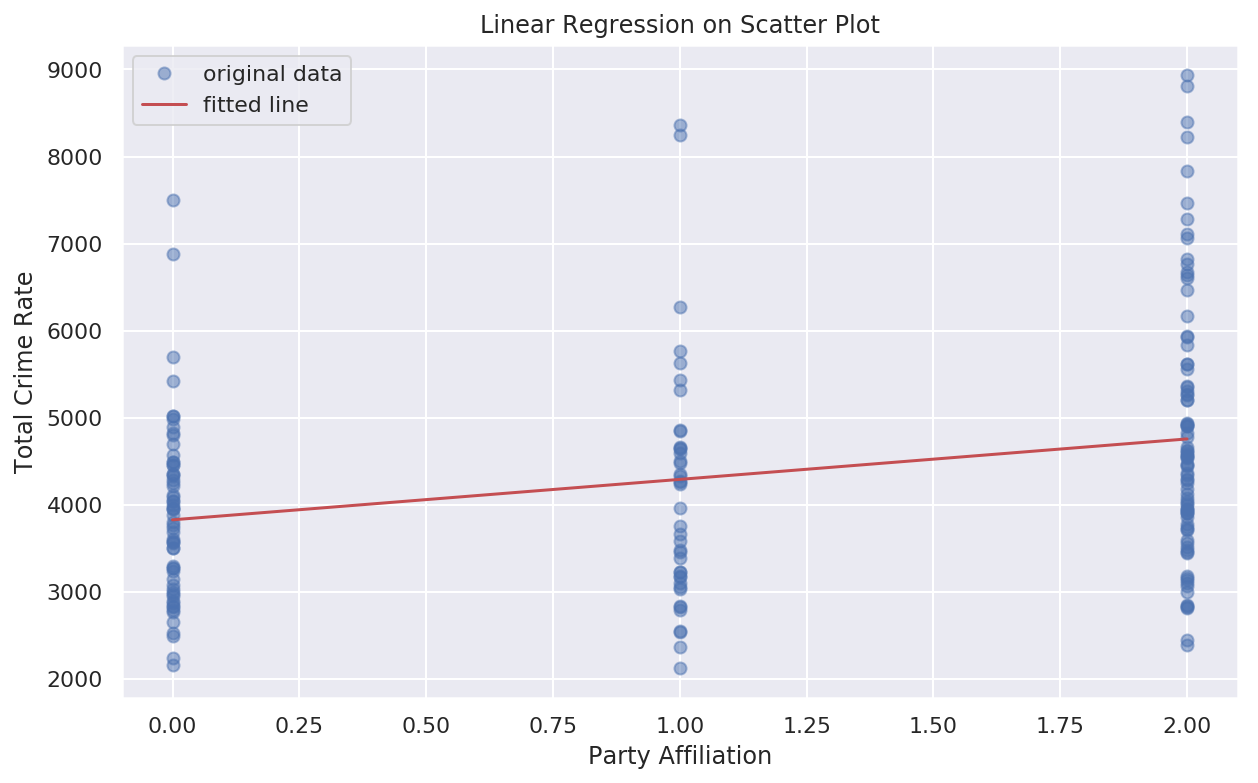

In [44]:
# Plot regression on the graph
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', label='original data',alpha=0.5)
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.title('Linear Regression on Scatter Plot')
plt.xlabel('Party Affiliation')
plt.ylabel('Total Crime Rate')
plt.legend()

# Ethics & Privacy
## Ethical Considerations
Our group took every consideration to collect data uniformly from federally funded and nonpartisan websites as well as conduct analyses uniformly across all data sets. Any personal opinions or sentiments were not discussed or applied in the collecting, processing or analyzing the data or interpretation of the results. The state selection process chosen for the sample size involved the use of ‘swing’ states that are not associated with long term specific party affiliation to both avoid the pitfall of ‘cherry picking’ states with specific party association as well as the possibility for the state chosen to have equal chance of being represented by either party each year. A federally funded website dedicated to the uniform reporting of crime data and published by the FBI, a bipartisan agency of the Department of Justice, was selected as our source for data as definitions and collection have already been normalized by the agency. The only ethical roadblock encountered by our group was in how some crimes such as sexual assaults often times are severely underreported and that other crimes could potentially be underreported due to a victim’s protected class status or even law enforcement documentational negligence. In order to address the deflated number of crimes attributed to sexual assault and rape, that variable was dropped in the analysis as there was no simple method to normalize that variable with the other forms of crime. While there was no simple way to address underreported crimes associated with victims protected class or negligence of law enforcement, we were able to reconcile that the likelihood of a crime not being reported due to those reasons would probably be uniform across all crimes within a state which would hence be normalized by the time the data was published. 

## Privacy 
We did not need to be as concerned about individual privacy as no personal individual information is ever implicated in the data we used. All datasets were either bulk figures of crime rates across an entire state or widely publicly available information about state legislature majority parties. We sourced our political affiliation data from a top-searched site, ncsl.org, and our crime data from a Department of Justice run website. We do have granted permission to use this data for the purpose of correlating political party and crime; however, they do not accept any liability for how the data from their site is utilized. It is expressly stated on the DOJ main website that any information presented is considered public domain and may be copied and distributed without written permission. No other possible impingement on the personal privacy of any individual could be identified by any group members.

# Conclusion & Discussion
Throughout our project, we faced challenges as our data did not produce any significant or possibly significant trends for us to follow. 

Our initial approach was to select a bulk of states representative of the various regions, population sizes, and historical political affiliation trends in the United States such that we could draw conclusions based on our sample set. We drew our data on state party affiliation from ncsl.org and saw that it was reliable enough as it is a commonly used site and the number of representatives in state legislatures each year are indisputable historical figures that could not have biases or error. In contrast there are biases that can be introduced to crime data due to systemic issues that we discuss in our ethics and data cleaning sections. Our crime dataset, downloaded from UCRDataTool.gov, an official site of the United States government, supported by the U.S. Department of Justice, proved to be a reliable and very manageable set as all of the crime statistics were already normalized to population sizes (crime per 100,000 individuals). However, when we took a closer look at the data points of higher crime rates, we found that states with more dense populations had the highest crime rates regardless of representative party affiliation. Given more time, we would have explored crime rates in the most populous cities of each of our states and normalized based on those population sizes and brought in more analysis on the city-level legislative political affiliation as they hold more influence on the police procedure in these cities, which could be a significant influence on crime rates that is not addressed in this project. 

Crime is a complex and charged issue with many sides looking for scapegoats to blame. 
As we approach another election cycle, political parties will again look for flaws in the other’s policy proposals, and we ran this exploration and analysis of data to evaluate if the make-up of a state’s legislative bodies had any effects on crime rates. As with any other exploration of data, it is flawed in the exclusion of some factors as mentioned before, and thus could have artificially introduced biases that influence the correlation of certain majority parties to a higher crime rate since we were not able to introduce other levels of controls due to time constraints. 

However we do find the statistical correlations we found to be interesting and relevant. A very slightly positive correlation (adjusted R-squared=0.082) was found with a significant p-value (3.61e-05) below 0.05 correlating states with Democratic majority in legislature to higher overall crime rates. We however had limited metrics for party control of a state as we only had a ternary system: Republican, split, or Democrat. With deeper information on the exact number of representatives for each party may have given us a less significant p-value for our correlation, so we would have liked to pursue this if we could have found a single source for this information. 

Our statistical conclusion is in contrast to another study conducted at the University of South Florida that studies the relationship between political decisions on police expenditures--and considers many factors including rates of foreign-borne residents as well as expenditures in the judicial and  corrections programs --and crime rates (Burch, 2018). They found that both violent and property crime rates were higher in Republican controlled states. However regardless of conclusions for which party is correlated to higher crime rates, having statistically significant results should be a motivating factor for voters to be more cognizant of their decisions each election season. There are many groups who are continually scrutinizing the lasting effects of each party’s legislative choices, many directly associated with political campaigns, and our results are interesting, but they are just another drop in the ocean in terms of societal impact. 